# Data Preprocessing

In [ ]:
path='drive/My Drive/IBM_Hack_2020/datasets/'

In [ ]:
!cp -r "{path}" .

In [ ]:
cd 'datasets'

/content/datasets


In [ ]:
!ls

 aemo_dispatch_scada_2018.csv.zip
 AL_WIND_07_12.xlsx
 GEFCom2012.zip
 GEFCom2014.zip
'La Haute Borne Dataset 2013-16.zip'
'La Haute Borne Dataset 2017-20.zip'
'La Haute Borne Dataset Metadata.zip'
'La Haute Borne Wind Turbine Metadata.zip'
 la_haute_turbine_power_wind.csv
 les_offshore_validation.pdf
 PUBLIC_DISPATCHSCADA_202005281435_0000000323531442.zip
 Wind_Forecast_Dataset_Kaggle.zip
 wind_power_.csv
 wind_power.csv


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [ ]:
nf=2050
wf=25

In [ ]:
!unzip "GEFCom2014.zip"

Archive:  GEFCom2014.zip
   creating: GEFCom2014 Data/
 extracting: GEFCom2014 Data/GEFCom2014-S_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-W_V2.zip  
  inflating: GEFCom2014 Data/READ ME_V2.txt  
  inflating: GEFCom2014 Data/Provisional_Leaderboard_V2.xlsx  
 extracting: GEFCom2014 Data/GEFCom2014-L_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-E_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-P_V2.zip  


In [ ]:
!unzip "GEFCom2014 Data/GEFCom2014-W_V2.zip"

Archive:  GEFCom2014 Data/GEFCom2014-W_V2.zip
   creating: Wind/
  inflating: Wind/Instructions.txt   
   creating: Wind/Solution to Task 15/
  inflating: Wind/Solution to Task 15/solution15_W.csv  
   creating: Wind/Task 1/
   creating: Wind/Task 10/
  inflating: Wind/Task 10/benchmark10_W.csv  
 extracting: Wind/Task 10/Task10_W_Zone1_10.zip  
  inflating: Wind/Task 10/TaskExpVars10_W_Zone1_10.zip  
   creating: Wind/Task 11/
  inflating: Wind/Task 11/benchmark11_W.csv  
 extracting: Wind/Task 11/Task11_W_Zone1_10.zip  
  inflating: Wind/Task 11/TaskExpVars11_W_Zone1_10.zip  
   creating: Wind/Task 12/
  inflating: Wind/Task 12/benchmark12_W.csv  
 extracting: Wind/Task 12/Task12_W_Zone1_10.zip  
  inflating: Wind/Task 12/TaskExpVars12_W_Zone1_10.zip  
   creating: Wind/Task 13/
  inflating: Wind/Task 13/benchmark13_W.csv  
 extracting: Wind/Task 13/Task13_W_Zone1_10.zip  
  inflating: Wind/Task 13/TaskExpVars13_W_Zone1_10.zip  
   creating: Wind/Task 14/
  inflating: Wind/Task 14/be

In [ ]:
for i in range(1,16):
  os.system(f"unzip 'Wind/Task {i}/Task{i}_W_Zone1_10.zip'")

In [ ]:
!ls

 aemo_dispatch_scada_2018.csv.zip
 AL_WIND_07_12.xlsx
 GEFCom2012.zip
'GEFCom2014 Data'
 GEFCom2014.zip
'La Haute Borne Dataset 2013-16.zip'
'La Haute Borne Dataset 2017-20.zip'
'La Haute Borne Dataset Metadata.zip'
'La Haute Borne Wind Turbine Metadata.zip'
 la_haute_turbine_power_wind.csv
 les_offshore_validation.pdf
 PUBLIC_DISPATCHSCADA_202005281435_0000000323531442.zip
 Task10_W_Zone1_10
 Task11_W_Zone1_10
 Task12_W_Zone1_10
 Task13_W_Zone1_10
 Task14_W_Zone1_10
 Task15_W_Zone1_10
 Task1_W_Zone1_10
 Task2_W_Zone1_10
 Task3_W_Zone1_10
 Task4_W_Zone1_10
 Task5_W_Zone1_10
 Task6_W_Zone1_10
 Task7_W_Zone1_10
 Task8_W_Zone1_10
 Task9_W_Zone1_10
 Wind
 Wind_Forecast_Dataset_Kaggle.zip
 wind_power_.csv
 wind_power.csv


In [ ]:
dfs=[]
for i in range(1,16):
  for j in range(1,11):
    dfs.append(pd.read_csv(f'Task{i}_W_Zone1_10/Task{i}_W_Zone{j}.csv'))
  
df1=pd.concat(dfs)
df1.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701


In [ ]:
df1['Ws']=df1.apply(lambda row: (float(row['U100'])**2 + float(row['V100'])**2)**0.5, axis=1)
df1.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,Ws
0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,4.652334
1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,4.154892
2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3.712577
3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,3.234831
4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.976332


In [ ]:
df1.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,Ws
count,1.752960e+06,1.752526e+06,1.752960e+06,1.752960e+06,1.752960e+06,1.752960e+06,1.752960e+06
mean,5.500000e+00,3.522143e-01,7.352539e-01,2.081317e-01,1.131939e+00,2.148229e-01,6.478047e+00
std,2.872282e+00,3.079139e-01,2.994508e+00,3.084555e+00,4.751725e+00,5.048161e+00,2.724910e+00
min,1.000000e+00,0.000000e+00,-8.371644e+00,-1.292358e+01,-1.242535e+01,-1.979200e+01,1.281766e-02
25%,3.000000e+00,7.659055e-02,-1.549421e+00,-2.005406e+00,-2.507429e+00,-3.535327e+00,4.613542e+00
50%,5.500000e+00,2.715638e-01,4.563627e-01,5.406767e-01,9.014205e-01,1.010219e+00,6.303703e+00
75%,8.000000e+00,5.900019e-01,2.691794e+00,2.409124e+00,4.539965e+00,4.173151e+00,8.100782e+00
max,1.000000e+01,1.000000e+00,1.483718e+01,1.140140e+01,2.139907e+01,1.630480e+01,2.215552e+01


In [ ]:
len(df1)-len(df)

728489

In [ ]:
df1.to_csv('gefcom14_wind.csv',index=False)

In [ ]:
!unzip "La Haute Borne Dataset Metadata.zip"

Archive:  La Haute Borne Dataset Metadata.zip
  inflating: data_description.csv    


In [ ]:
!unzip "La Haute Borne Dataset 2013-16.zip"

Archive:  La Haute Borne Dataset 2013-16.zip
  inflating: la-haute-borne-data-2013-2016.csv  


In [ ]:
!unzip "La Haute Borne Dataset 2017-20.zip"

Archive:  La Haute Borne Dataset 2017-20.zip
  inflating: la-haute-borne-data-2017-2020.csv  


In [ ]:
metadata=pd.read_csv('data_description.csv',sep=';')
metadata

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Q,Reactive_power,kVAr,NaN
1,Ws,Wind_speed,m/s,Average wind speed
2,Va2,Vane_position_2,deg,Second wind vane on the nacelle
3,Git,Gearbox_inlet_temperature,deg_C,NaN
4,Ot,Outdoor_temperature,deg_C,NaN
5,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
6,Nf,Grid_frequency,Hz,NaN
7,Nu,Grid_voltage,V,NaN
8,Dst,Generator_stator_temperature,deg_C,NaN
9,Wa_c,Absolute_wind_direction_corrected,deg,NaN


In [ ]:
data=pd.read_csv('la-haute-borne-data-2013-2016.csv',sep=';')
data.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,...,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-07T01:20:00+01:00,41.160000,-1.000000,44.990002,11.27,12.65,12.0,13.0,0.41,204.71001,125.760000,987.83002,140.620000,-6.15,-6.39000,-5.8900,0.08000,-1.380000,-5.620000,-0.70,0.890000,0.000000,-0.79,0.130000,0.030000,1.38,0.700000,5.62000,0.890000,1.00,1.00,1.00,0.00,202.28,123.620000,985.67999,140.580000,28.330000,28.000000,...,4.04,-41.950001,53.730000,10.74,5.25,5.2,5.3,0.05,49.980000,49.959999,50.009998,0.01,705.81000,704.90997,706.41998,0.34,1.91,1.17,9.34,1.32,18.299999,18.299999,18.299999,0.00,-69.540001,-311.60999,-15.660000,30.809999,NaN,NaN,NaN,NaN,37.77000,NaN,NaN,NaN,33.75000,NaN,NaN,NaN
1,R80711,2013-01-05T22:20:00+01:00,-1.000000,-1.000000,-0.870000,0.01,12.95,12.0,13.0,0.16,1157.03000,968.130000,1370.16000,106.870000,1556.76,834.54999,2278.9399,344.91000,161.860000,47.680000,301.62,60.209999,20.170000,10.61,25.120001,2.970000,163.41,50.060001,302.07999,59.549999,0.99,1.00,0.91,0.02,1155.52,966.429990,1368.72000,106.940000,29.580000,28.900000,...,12.88,-39.160000,49.709999,15.27,4.77,4.7,4.9,0.08,50.020000,50.000000,50.049999,0.01,703.96002,701.51001,705.13000,0.77,11.00,9.19,13.06,1.02,20.709999,20.500000,20.900000,0.12,1302.110000,470.04001,2110.980000,389.280000,NaN,NaN,NaN,NaN,313.35001,NaN,NaN,NaN,279.92999,NaN,NaN,NaN
2,R80711,2013-01-06T08:30:00+01:00,-1.000000,-1.000000,-1.000000,0.00,13.74,13.0,14.0,0.35,1021.18000,970.070010,1090.63000,34.230000,1142.24,759.06000,1384.6300,120.20000,91.400002,47.220001,125.49,16.010000,22.740000,12.86,29.740000,2.390000,94.32,52.430000,127.89000,15.540000,0.96,0.99,0.91,0.01,1019.75,968.700010,1089.18990,34.250000,42.520000,41.750000,...,-5.09,-58.009998,26.590000,12.87,5.84,5.8,5.9,0.04,49.980000,49.959999,50.000000,0.01,701.56000,700.03998,703.15997,0.43,9.70,9.21,10.37,0.33,22.000000,22.000000,22.100000,0.01,851.960020,465.51999,1101.860000,122.770000,NaN,NaN,NaN,NaN,241.59000,NaN,NaN,NaN,246.67999,NaN,NaN,NaN
3,R80711,2013-01-05T21:10:00+01:00,44.990002,44.990002,44.990002,0.00,12.14,12.0,13.0,0.27,122.29000,79.279999,175.20000,22.840000,-6.09,-6.42000,-5.8600,0.09000,-0.920000,-1.410000,-0.58,0.130000,0.000000,-0.19,0.100000,0.010000,0.92,0.580000,1.41000,0.130000,1.00,1.00,1.00,0.00,119.91,76.730003,172.60001,22.820000,29.049999,28.900000,...,6.64,-30.110001,49.830002,12.62,5.36,5.3,5.5,0.09,49.959999,49.919998,50.009998,0.02,698.96997,698.03998,700.88000,0.51,1.14,0.73,1.63,0.22,19.400000,19.400000,19.600000,0.02,-76.339996,-141.82001,-39.889999,19.170000,NaN,NaN,NaN,NaN,280.75000,NaN,NaN,NaN,274.12000,NaN,NaN,NaN
4,R80711,2013-01-06T11:20:00+01:00,-0.760000,-1.000000,0.000000,0.40,13.78,13.0,14.0,0.35,1041.27000,960.599980,1157.36000,64.559998,1052.10,249.23000,1557.4200,374.07001,87.900002,0.780000,159.72,46.110001,75.080002,21.92,109.340000,32.619999,124.47,39.889999,183.75000,32.650002,0.77,1.00,0.03,0.28,1039.77,959.049990,1155.93990,64.589996,44.320000,43.599998,...,-0.86,-73.269997,57.419998,16.93,6.57,6.5,6.7,0.09,49.980000,49.959999,50.009998,0.01,700.78003,699.06000,702.03003,0.66,9.90,9.11,11.01,0.62,23.700001,23.600000,23.799999,0.02,785.609990,7.49000,1321.530000,381.579990,NaN,NaN,NaN,NaN,293.01001,NaN,NaN,NaN,293.87000,NaN,NaN,NaN


In [ ]:
data_=pd.read_csv('la-haute-borne-data-2017-2020.csv',sep=';')
data_.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,...,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.0,14.0,14.0,14.0,0.0,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,...,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.9,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,...,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.9,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,...,3.890000,-101.290000,52.270000,13.83,1.79,1.6,1.9,0.09,50.000000,49.980000,50.020000,0.01,704.53003,703.20001,705.48999,0.57,11.25,10.10,12.31,0.47,23.000000,23.0,23.000000,0.00,1418.660000,973.60999,1829.93010,180.39999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,1198.470000,1037.4100,1342.12000,78.470001,1732.66,1234.80,2216.26,252.41,190.61000,100.63000,286.92999,47.790001,21.770000,13.110000,26.030001,1.86,191.96001,102.22000,287.82999,47.52,0.99,1.0,0.98,0.0,1200.480000,1039.11,1344.370000,78.629997,37.939999,37.200001,...,-0.990000,-66.940002,39.950001,13.95,0.85,0.6,1.0,0.11,50.009998,49.990002,50.029999,0.01,705.90002,704.84003,707.46002,0.54,11.43,9.87,12.83,0.75,22.700001,22.6,22.700001,0.01,1497.980000,922.96997,2040.68010,282.16000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.0,17.0,17.0,17.0,0.0,159.840000,148.7500,168.99001,4.260000,2.42,2.14,2.69,0.07,-2.88000,-3.93000,-2.36000,0.260000,0.000000,0.000000,0.600000,0.03,2.89000,2.36000,3.93000,0.27,1.00,1.0,1.00,0.0,159.929990,148.84,169.230000,4.250000,37.430000,37.200001,...,8.180000,-30.309999,39.560001,6.63,6.73,6.6,6.8,0.04,49.970001,49.939999,50.009998,0.02,701.59003,699.40997,702.95001,0.76,1.52,1.41,1.60,0.04,23.209999,23.1,23.299999,0.09,-172.480000,-243.64999,-135.21001,17.60000,NaN,NaN,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN


In [ ]:
data=pd.concat([data,data_])
data.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,...,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-07T01:20:00+01:00,41.160000,-1.000000,44.990002,11.27,12.65,12.0,13.0,0.41,204.71001,125.760000,987.83002,140.620000,-6.15,-6.39000,-5.8900,0.08000,-1.380000,-5.620000,-0.70,0.890000,0.000000,-0.79,0.130000,0.030000,1.38,0.700000,5.62000,0.890000,1.00,1.00,1.00,0.00,202.28,123.620000,985.67999,140.580000,28.330000,28.000000,...,4.04,-41.950001,53.730000,10.74,5.25,5.2,5.3,0.05,49.980000,49.959999,50.009998,0.01,705.81000,704.90997,706.41998,0.34,1.91,1.17,9.34,1.32,18.299999,18.299999,18.299999,0.00,-69.540001,-311.60999,-15.660000,30.809999,NaN,NaN,NaN,NaN,37.77000,NaN,NaN,NaN,33.75000,NaN,NaN,NaN
1,R80711,2013-01-05T22:20:00+01:00,-1.000000,-1.000000,-0.870000,0.01,12.95,12.0,13.0,0.16,1157.03000,968.130000,1370.16000,106.870000,1556.76,834.54999,2278.9399,344.91000,161.860000,47.680000,301.62,60.209999,20.170000,10.61,25.120001,2.970000,163.41,50.060001,302.07999,59.549999,0.99,1.00,0.91,0.02,1155.52,966.429990,1368.72000,106.940000,29.580000,28.900000,...,12.88,-39.160000,49.709999,15.27,4.77,4.7,4.9,0.08,50.020000,50.000000,50.049999,0.01,703.96002,701.51001,705.13000,0.77,11.00,9.19,13.06,1.02,20.709999,20.500000,20.900000,0.12,1302.110000,470.04001,2110.980000,389.280000,NaN,NaN,NaN,NaN,313.35001,NaN,NaN,NaN,279.92999,NaN,NaN,NaN
2,R80711,2013-01-06T08:30:00+01:00,-1.000000,-1.000000,-1.000000,0.00,13.74,13.0,14.0,0.35,1021.18000,970.070010,1090.63000,34.230000,1142.24,759.06000,1384.6300,120.20000,91.400002,47.220001,125.49,16.010000,22.740000,12.86,29.740000,2.390000,94.32,52.430000,127.89000,15.540000,0.96,0.99,0.91,0.01,1019.75,968.700010,1089.18990,34.250000,42.520000,41.750000,...,-5.09,-58.009998,26.590000,12.87,5.84,5.8,5.9,0.04,49.980000,49.959999,50.000000,0.01,701.56000,700.03998,703.15997,0.43,9.70,9.21,10.37,0.33,22.000000,22.000000,22.100000,0.01,851.960020,465.51999,1101.860000,122.770000,NaN,NaN,NaN,NaN,241.59000,NaN,NaN,NaN,246.67999,NaN,NaN,NaN
3,R80711,2013-01-05T21:10:00+01:00,44.990002,44.990002,44.990002,0.00,12.14,12.0,13.0,0.27,122.29000,79.279999,175.20000,22.840000,-6.09,-6.42000,-5.8600,0.09000,-0.920000,-1.410000,-0.58,0.130000,0.000000,-0.19,0.100000,0.010000,0.92,0.580000,1.41000,0.130000,1.00,1.00,1.00,0.00,119.91,76.730003,172.60001,22.820000,29.049999,28.900000,...,6.64,-30.110001,49.830002,12.62,5.36,5.3,5.5,0.09,49.959999,49.919998,50.009998,0.02,698.96997,698.03998,700.88000,0.51,1.14,0.73,1.63,0.22,19.400000,19.400000,19.600000,0.02,-76.339996,-141.82001,-39.889999,19.170000,NaN,NaN,NaN,NaN,280.75000,NaN,NaN,NaN,274.12000,NaN,NaN,NaN
4,R80711,2013-01-06T11:20:00+01:00,-0.760000,-1.000000,0.000000,0.40,13.78,13.0,14.0,0.35,1041.27000,960.599980,1157.36000,64.559998,1052.10,249.23000,1557.4200,374.07001,87.900002,0.780000,159.72,46.110001,75.080002,21.92,109.340000,32.619999,124.47,39.889999,183.75000,32.650002,0.77,1.00,0.03,0.28,1039.77,959.049990,1155.93990,64.589996,44.320000,43.599998,...,-0.86,-73.269997,57.419998,16.93,6.57,6.5,6.7,0.09,49.980000,49.959999,50.009998,0.01,700.78003,699.06000,702.03003,0.66,9.90,9.11,11.01,0.62,23.700001,23.600000,23.799999,0.02,785.609990,7.49000,1321.530000,381.579990,NaN,NaN,NaN,NaN,293.01001,NaN,NaN,NaN,293.87000,NaN,NaN,NaN


In [ ]:
len(data)

1057968

In [ ]:
data.columns

Index(['Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min', 'Ba_max',
       'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max', 'Rt_std',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=138)

In [ ]:
data.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
Ba_avg,1051338.0,13.499570,27.756443,-121.26000,-0.990000,-0.970000,5.120000,262.609990
Ba_min,1051338.0,12.412838,27.597324,-131.02000,-1.000000,-0.990000,-0.500000,262.609990
Ba_max,1051338.0,14.974186,28.329445,-121.26000,-0.990000,-0.500000,18.190001,262.609990
Ba_std,1051338.0,0.860693,3.876553,0.00000,0.000000,0.000000,0.140000,90.230003
Rt_avg,1051341.0,19.360103,6.282772,0.00000,14.030000,19.000000,24.000000,215.000000
Rt_min,1051341.0,19.165775,6.287114,0.00000,14.000000,19.000000,24.000000,215.000000
Rt_max,1051341.0,19.579605,6.286602,0.00000,15.000000,19.000000,24.000000,215.000000
Rt_std,1051341.0,0.105671,0.165719,0.00000,0.000000,0.000000,0.200000,39.790000
DCs_avg,1051341.0,1061.361979,621.338391,-574.90002,964.120000,1182.270000,1568.590000,1807.600000
DCs_min,1051341.0,948.419482,588.340405,-575.02002,948.979980,1033.460000,1370.160000,1802.610000


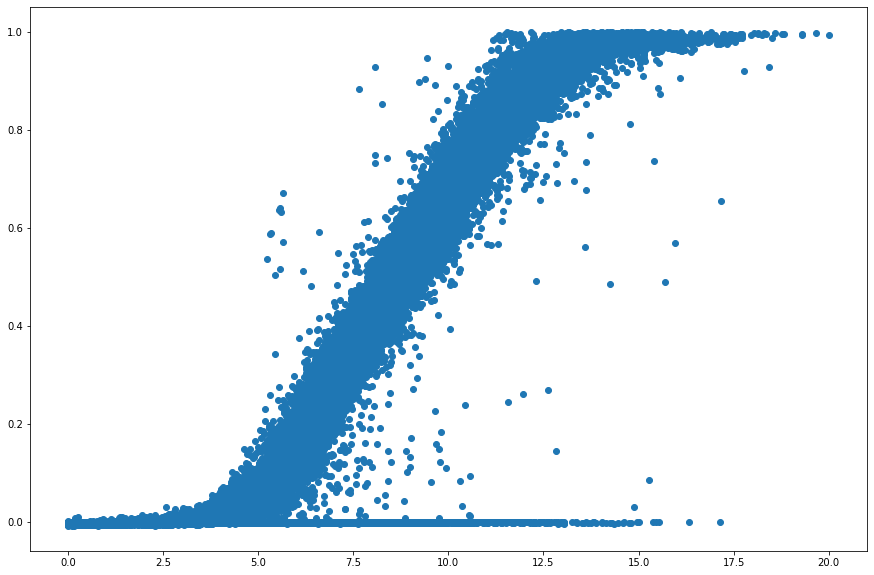

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data['Ws_avg'][:200000],data['P_avg'][:200000]/2050)

In [ ]:
data[data['P_avg']<100]['Ws_avg'].describe()

count    419880.000000
mean          3.248016
std           1.770925
min           0.000000
25%           2.160000
50%           3.370000
75%           4.370000
max          21.290000
Name: Ws_avg, dtype: float64

In [ ]:
df=data.loc[(data['P_avg'] >= 25) | (data['Ws_avg'] <= 5)]
df.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,...,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-07T01:20:00+01:00,41.160000,-1.000000,44.990002,11.27,12.65,12.0,13.0,0.41,204.71001,125.760000,987.83002,140.620000,-6.15,-6.39000,-5.8900,0.08000,-1.380000,-5.620000,-0.70,0.890000,0.000000,-0.79,0.130000,0.030000,1.38,0.700000,5.62000,0.890000,1.00,1.00,1.00,0.00,202.28,123.620000,985.67999,140.580000,28.330000,28.000000,...,4.04,-41.950001,53.730000,10.74,5.25,5.2,5.3,0.05,49.980000,49.959999,50.009998,0.01,705.81000,704.90997,706.41998,0.34,1.91,1.17,9.34,1.32,18.299999,18.299999,18.299999,0.00,-69.540001,-311.60999,-15.660000,30.809999,NaN,NaN,NaN,NaN,37.77000,NaN,NaN,NaN,33.75000,NaN,NaN,NaN
1,R80711,2013-01-05T22:20:00+01:00,-1.000000,-1.000000,-0.870000,0.01,12.95,12.0,13.0,0.16,1157.03000,968.130000,1370.16000,106.870000,1556.76,834.54999,2278.9399,344.91000,161.860000,47.680000,301.62,60.209999,20.170000,10.61,25.120001,2.970000,163.41,50.060001,302.07999,59.549999,0.99,1.00,0.91,0.02,1155.52,966.429990,1368.72000,106.940000,29.580000,28.900000,...,12.88,-39.160000,49.709999,15.27,4.77,4.7,4.9,0.08,50.020000,50.000000,50.049999,0.01,703.96002,701.51001,705.13000,0.77,11.00,9.19,13.06,1.02,20.709999,20.500000,20.900000,0.12,1302.110000,470.04001,2110.980000,389.280000,NaN,NaN,NaN,NaN,313.35001,NaN,NaN,NaN,279.92999,NaN,NaN,NaN
2,R80711,2013-01-06T08:30:00+01:00,-1.000000,-1.000000,-1.000000,0.00,13.74,13.0,14.0,0.35,1021.18000,970.070010,1090.63000,34.230000,1142.24,759.06000,1384.6300,120.20000,91.400002,47.220001,125.49,16.010000,22.740000,12.86,29.740000,2.390000,94.32,52.430000,127.89000,15.540000,0.96,0.99,0.91,0.01,1019.75,968.700010,1089.18990,34.250000,42.520000,41.750000,...,-5.09,-58.009998,26.590000,12.87,5.84,5.8,5.9,0.04,49.980000,49.959999,50.000000,0.01,701.56000,700.03998,703.15997,0.43,9.70,9.21,10.37,0.33,22.000000,22.000000,22.100000,0.01,851.960020,465.51999,1101.860000,122.770000,NaN,NaN,NaN,NaN,241.59000,NaN,NaN,NaN,246.67999,NaN,NaN,NaN
3,R80711,2013-01-05T21:10:00+01:00,44.990002,44.990002,44.990002,0.00,12.14,12.0,13.0,0.27,122.29000,79.279999,175.20000,22.840000,-6.09,-6.42000,-5.8600,0.09000,-0.920000,-1.410000,-0.58,0.130000,0.000000,-0.19,0.100000,0.010000,0.92,0.580000,1.41000,0.130000,1.00,1.00,1.00,0.00,119.91,76.730003,172.60001,22.820000,29.049999,28.900000,...,6.64,-30.110001,49.830002,12.62,5.36,5.3,5.5,0.09,49.959999,49.919998,50.009998,0.02,698.96997,698.03998,700.88000,0.51,1.14,0.73,1.63,0.22,19.400000,19.400000,19.600000,0.02,-76.339996,-141.82001,-39.889999,19.170000,NaN,NaN,NaN,NaN,280.75000,NaN,NaN,NaN,274.12000,NaN,NaN,NaN
4,R80711,2013-01-06T11:20:00+01:00,-0.760000,-1.000000,0.000000,0.40,13.78,13.0,14.0,0.35,1041.27000,960.599980,1157.36000,64.559998,1052.10,249.23000,1557.4200,374.07001,87.900002,0.780000,159.72,46.110001,75.080002,21.92,109.340000,32.619999,124.47,39.889999,183.75000,32.650002,0.77,1.00,0.03,0.28,1039.77,959.049990,1155.93990,64.589996,44.320000,43.599998,...,-0.86,-73.269997,57.419998,16.93,6.57,6.5,6.7,0.09,49.980000,49.959999,50.009998,0.01,700.78003,699.06000,702.03003,0.66,9.90,9.11,11.01,0.62,23.700001,23.600000,23.799999,0.02,785.609990,7.49000,1321.530000,381.579990,NaN,NaN,NaN,NaN,293.01001,NaN,NaN,NaN,293.87000,NaN,NaN,NaN


In [ ]:
len(df)

1024471

In [ ]:
df[df['P_avg']>(1900/2050)]['Ws_avg'].describe()

count    9435.000000
mean        0.459971
std         0.047458
min         0.202333
25%         0.428667
50%         0.452000
75%         0.483167
max         0.722333
Name: Ws_avg, dtype: float64

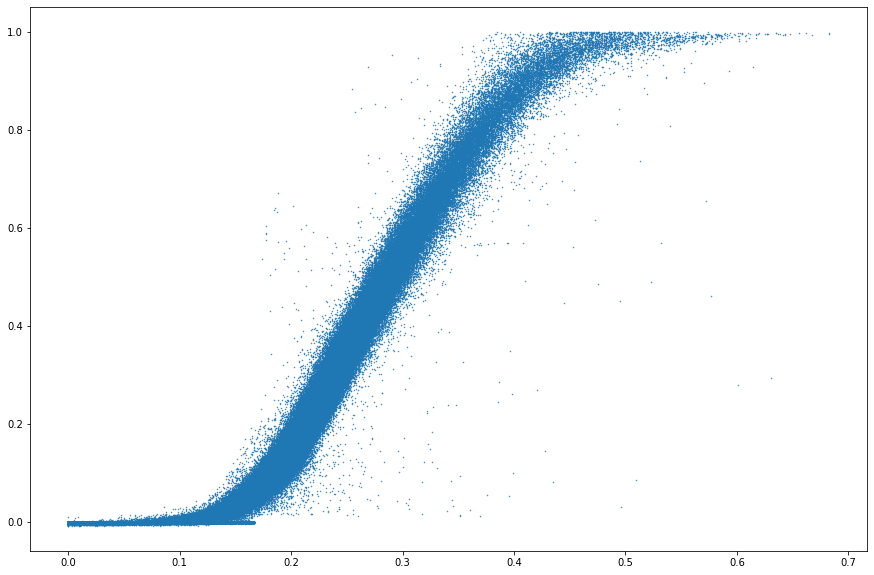

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df['Ws_avg'][:400000],df['P_avg'][:400000],s=0.2)

In [ ]:
0.4*30

12.0

In [ ]:
del data,data_

In [ ]:
df.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,...,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-07T01:20:00+01:00,41.160000,-1.000000,44.990002,11.27,12.65,12.0,13.0,0.41,204.71001,125.760000,987.83002,140.620000,-6.15,-6.39000,-5.8900,0.08000,-1.380000,-5.620000,-0.70,0.890000,0.000000,-0.79,0.130000,0.030000,1.38,0.700000,5.62000,0.890000,1.00,1.00,1.00,0.00,202.28,123.620000,985.67999,140.580000,28.330000,28.000000,...,4.04,-41.950001,53.730000,10.74,5.25,5.2,5.3,0.05,49.980000,49.959999,50.009998,0.01,705.81000,704.90997,706.41998,0.34,1.91,1.17,9.34,1.32,18.299999,18.299999,18.299999,0.00,-69.540001,-311.60999,-15.660000,30.809999,NaN,NaN,NaN,NaN,37.77000,NaN,NaN,NaN,33.75000,NaN,NaN,NaN
1,R80711,2013-01-05T22:20:00+01:00,-1.000000,-1.000000,-0.870000,0.01,12.95,12.0,13.0,0.16,1157.03000,968.130000,1370.16000,106.870000,1556.76,834.54999,2278.9399,344.91000,161.860000,47.680000,301.62,60.209999,20.170000,10.61,25.120001,2.970000,163.41,50.060001,302.07999,59.549999,0.99,1.00,0.91,0.02,1155.52,966.429990,1368.72000,106.940000,29.580000,28.900000,...,12.88,-39.160000,49.709999,15.27,4.77,4.7,4.9,0.08,50.020000,50.000000,50.049999,0.01,703.96002,701.51001,705.13000,0.77,11.00,9.19,13.06,1.02,20.709999,20.500000,20.900000,0.12,1302.110000,470.04001,2110.980000,389.280000,NaN,NaN,NaN,NaN,313.35001,NaN,NaN,NaN,279.92999,NaN,NaN,NaN
2,R80711,2013-01-06T08:30:00+01:00,-1.000000,-1.000000,-1.000000,0.00,13.74,13.0,14.0,0.35,1021.18000,970.070010,1090.63000,34.230000,1142.24,759.06000,1384.6300,120.20000,91.400002,47.220001,125.49,16.010000,22.740000,12.86,29.740000,2.390000,94.32,52.430000,127.89000,15.540000,0.96,0.99,0.91,0.01,1019.75,968.700010,1089.18990,34.250000,42.520000,41.750000,...,-5.09,-58.009998,26.590000,12.87,5.84,5.8,5.9,0.04,49.980000,49.959999,50.000000,0.01,701.56000,700.03998,703.15997,0.43,9.70,9.21,10.37,0.33,22.000000,22.000000,22.100000,0.01,851.960020,465.51999,1101.860000,122.770000,NaN,NaN,NaN,NaN,241.59000,NaN,NaN,NaN,246.67999,NaN,NaN,NaN
3,R80711,2013-01-05T21:10:00+01:00,44.990002,44.990002,44.990002,0.00,12.14,12.0,13.0,0.27,122.29000,79.279999,175.20000,22.840000,-6.09,-6.42000,-5.8600,0.09000,-0.920000,-1.410000,-0.58,0.130000,0.000000,-0.19,0.100000,0.010000,0.92,0.580000,1.41000,0.130000,1.00,1.00,1.00,0.00,119.91,76.730003,172.60001,22.820000,29.049999,28.900000,...,6.64,-30.110001,49.830002,12.62,5.36,5.3,5.5,0.09,49.959999,49.919998,50.009998,0.02,698.96997,698.03998,700.88000,0.51,1.14,0.73,1.63,0.22,19.400000,19.400000,19.600000,0.02,-76.339996,-141.82001,-39.889999,19.170000,NaN,NaN,NaN,NaN,280.75000,NaN,NaN,NaN,274.12000,NaN,NaN,NaN
4,R80711,2013-01-06T11:20:00+01:00,-0.760000,-1.000000,0.000000,0.40,13.78,13.0,14.0,0.35,1041.27000,960.599980,1157.36000,64.559998,1052.10,249.23000,1557.4200,374.07001,87.900002,0.780000,159.72,46.110001,75.080002,21.92,109.340000,32.619999,124.47,39.889999,183.75000,32.650002,0.77,1.00,0.03,0.28,1039.77,959.049990,1155.93990,64.589996,44.320000,43.599998,...,-0.86,-73.269997,57.419998,16.93,6.57,6.5,6.7,0.09,49.980000,49.959999,50.009998,0.01,700.78003,699.06000,702.03003,0.66,9.90,9.11,11.01,0.62,23.700001,23.600000,23.799999,0.02,785.609990,7.49000,1321.530000,381.579990,NaN,NaN,NaN,NaN,293.01001,NaN,NaN,NaN,293.87000,NaN,NaN,NaN


In [ ]:
df_=df[['Wind_turbine_name','Date_time','Ws_avg','Wa_avg','P_avg']]
df_.head()

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg
0,R80711,2013-01-07T01:20:00+01:00,3.55,22.77000,-1.380000
1,R80711,2013-01-05T22:20:00+01:00,5.30,298.35001,161.860000
2,R80711,2013-01-06T08:30:00+01:00,4.73,226.59000,91.400002
3,R80711,2013-01-05T21:10:00+01:00,2.66,265.75000,-0.920000
4,R80711,2013-01-06T11:20:00+01:00,4.76,278.01001,87.900002


In [ ]:
len(df_)

1024471

In [ ]:
df_.to_csv('la_haute_turbine_power_wind.csv',index=False)

In [ ]:
df=pd.read_csv('la_haute_turbine_power_wind.csv')
df.head()

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg
0,R80711,2013-01-07T01:20:00+01:00,3.55,22.77000,-1.380000
1,R80711,2013-01-05T22:20:00+01:00,5.30,298.35001,161.860000
2,R80711,2013-01-06T08:30:00+01:00,4.73,226.59000,91.400002
3,R80711,2013-01-05T21:10:00+01:00,2.66,265.75000,-0.920000
4,R80711,2013-01-06T11:20:00+01:00,4.76,278.01001,87.900002


In [ ]:
df['Wind_turbine_name'].value_counts()

R80736    261335
R80721    261134
R80711    260180
R80790    241822
Name: Wind_turbine_name, dtype: int64

In [ ]:
df.describe()

,Ws_avg,Wa_avg,P_avg
count,1.024471e+06,1.024471e+06,1.024471e+06
mean,5.361989e+00,1.799571e+02,3.461003e+02
std,2.541110e+00,9.432899e+01,4.337191e+02
min,0.000000e+00,0.000000e+00,-1.849000e+01
25%,3.930000e+00,9.724000e+01,2.420000e+01
50%,5.360000e+00,1.969700e+02,1.817400e+02
75%,6.680000e+00,2.480500e+02,4.925400e+02
max,2.427000e+01,3.600000e+02,2.051870e+03


In [ ]:
df['Ws_avg']=df['Ws_avg']/wf
df['P_avg']=df['P_avg']/nf
df['Wa_avg']=df['Wa_avg']/360
df.head()

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg
0,R80711,2013-01-07T01:20:00+01:00,0.1420,0.063250,-0.000673
1,R80711,2013-01-05T22:20:00+01:00,0.2120,0.828750,0.078956
2,R80711,2013-01-06T08:30:00+01:00,0.1892,0.629417,0.044585
3,R80711,2013-01-05T21:10:00+01:00,0.1064,0.738194,-0.000449
4,R80711,2013-01-06T11:20:00+01:00,0.1904,0.772250,0.042878


In [ ]:
df['datetime']=pd.to_datetime(df['Date_time'], format='%Y-%m-%dT%H:%M:%S%z', errors='raise')
df.head()

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg,datetime
0,R80711,2013-01-07T01:20:00+01:00,0.1420,0.063250,-0.000673,2013-01-07 01:20:00+01:00
1,R80711,2013-01-05T22:20:00+01:00,0.2120,0.828750,0.078956,2013-01-05 22:20:00+01:00
2,R80711,2013-01-06T08:30:00+01:00,0.1892,0.629417,0.044585,2013-01-06 08:30:00+01:00
3,R80711,2013-01-05T21:10:00+01:00,0.1064,0.738194,-0.000449,2013-01-05 21:10:00+01:00
4,R80711,2013-01-06T11:20:00+01:00,0.1904,0.772250,0.042878,2013-01-06 11:20:00+01:00


In [ ]:
df.sort_values('datetime',axis=0)

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg,datetime
313352,R80721,2013-01-01T00:00:00+01:00,0.2900,0.453222,0.331556,2013-01-01 00:00:00+01:00
800389,R80790,2013-01-01T00:00:00+01:00,0.3424,0.486250,0.532595,2013-01-01 00:00:00+01:00
511422,R80711,2013-01-01T00:00:00+01:00,0.3584,0.459028,0.523244,2013-01-01 00:00:00+01:00
664592,R80736,2013-01-01T00:00:00+01:00,0.3056,0.794972,0.390844,2013-01-01 00:00:00+01:00
210358,R80711,2013-01-01T00:10:00+01:00,0.3556,0.467472,0.517771,2013-01-01 00:10:00+01:00
...,...,...,...,...,...,...
884011,R80736,2018-01-12T23:50:00+01:00,0.0812,0.114056,0.000000,2018-01-12 23:50:00+01:00
888888,R80721,2018-01-13T00:00:00+01:00,0.0740,0.137889,0.000000,2018-01-13 00:00:00+01:00
983711,R80711,2018-01-13T00:00:00+01:00,0.1408,0.168500,0.012063,2018-01-13 00:00:00+01:00
1019660,R80736,2018-01-13T00:00:00+01:00,0.1000,0.124778,0.000000,2018-01-13 00:00:00+01:00


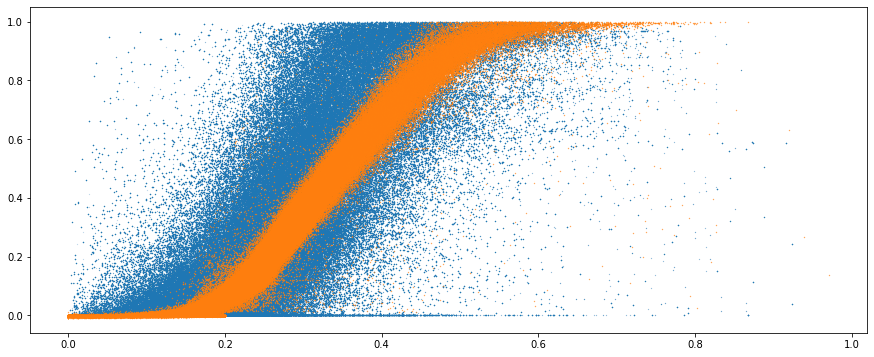

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df1['Ws']/24,df1['TARGETVAR'],s=0.01)
plt.scatter(df.Ws_avg,df.P_avg,s=0.1)

In [ ]:
df_=df1.loc[df1['TARGETVAR'] >= 0.0005]
len(df_)

1599980

In [ ]:
df_['Ws']=df_['Ws']/24
df_.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,Ws
1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,0.173121
2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,0.154691
3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,0.134785
4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701,0.124014
5,1,20120101 6:00,0.168781,1.986038,0.796304,2.655406,0.882648,0.116594


In [ ]:
x_train, y_train = df.loc[:,['Ws_avg','Wa_avg']].values, df['P_avg'].values

# Machine Learning

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import xgboost as xgb
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, x_train1.reshape(-1,1), y_train1.reshape(-1), scoring="neg_mean_absolute_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.05))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.2833 (0.0020)



In [ ]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(max_iter=1e7))                              
score = rmsle_cv(elasticnet)
print("\nEleatic Net score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Eleatic Net score: 0.3982 (0.0044)



In [ ]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.1,max_iter=100,max_leaf_nodes=6)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Hist Gradient Boosting score: 0.1238 (0.0022)



In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=3,
                              learning_rate=0.2, n_estimators=20,
                              #max_bin = 100, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.2319,
                              #feature_fraction_seed=9, bagging_seed=9,
                              #min_data_in_leaf =6, min_sum_hessian_in_leaf = 11
                             )
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1356 (0.0018)



In [ ]:
model_lgb.fit(x_train1.reshape(-1,1),y_train1.reshape(-1))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=3, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds=model_lgb.predict(x_test.reshape(-1,1))
preds

array([0.07008512, 0.07008512, 0.05719731, ..., 0.71524045, 0.61800833,
       0.61800833])

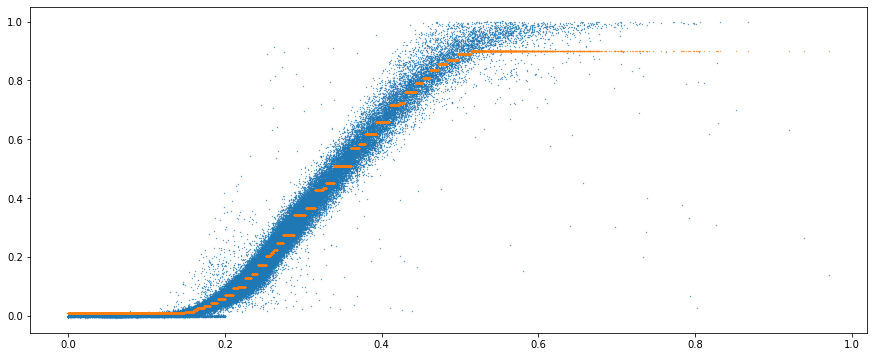

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x_test, y_test, s=0.1)
plt.scatter(x_test, preds, s=0.1)


In [ ]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.1,max_iter=100,max_leaf_nodes=6)
HistGB.fit(x_train,y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=6,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [ ]:
preds1=HistGB.predict(x_train)
preds1

array([0.00645882, 0.08675883, 0.04806948, ..., 0.67981554, 0.5856324 ,
       0.62884324])

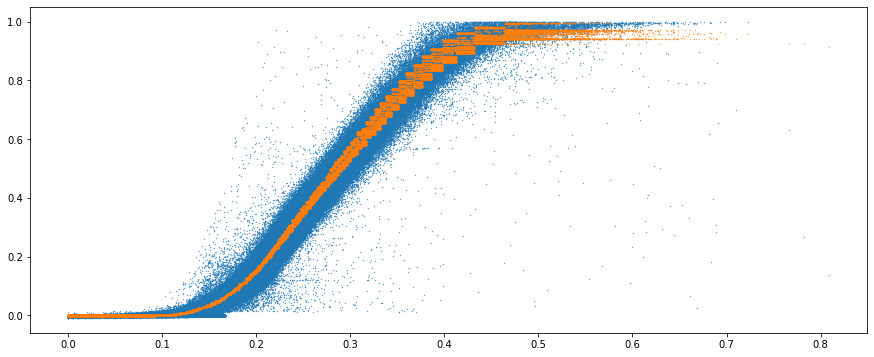

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x_train[:,0], y_train, s=0.1)
plt.scatter(x_train[:,0], preds1, s=0.1)

In [ ]:
0.5*wf

15.0

In [ ]:
0.94*(8000)

7520.0

In [ ]:
x=np.arange(0,1,0.001)
print(x.shape)
y=np.array([0.5]*1000)
print(y.shape)
preds=model_lgb.predict(np.concatenate((x,y),).reshape(-1,2))
preds.shape

(1000,)
(1000,)


(1000,)

In [ ]:
preds[:5]

array([0.00054129, 0.00054129, 0.00054129, 0.00054129, 0.00054129])

In [ ]:
preds1=HistGB.predict(np.concatenate((x,y),).reshape(-1,2))
preds1.shape

(1000,)

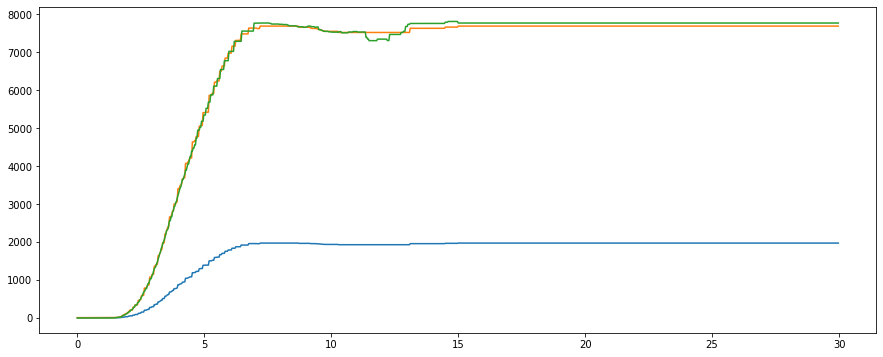

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(x[:1000]*wf,(preds*nf)[:1000])
plt.plot(x[:1000]*wf,(preds*8000)[:1000])
plt.plot(x[:1000]*wf,(preds1*8000)[:1000])

In [ ]:
preds[-5:]

array([0.00087962, 0.00087962, 0.00087962, 0.00087962, 0.00087962])

array([0.95, 0.96, 0.97, 0.98, 0.99])

# LSTM AE

In [ ]:
df=df.loc[(df['P_avg'] < 0.95) | (df['Ws_avg'] > 0.6)]
df_=df_.loc[(df_['TARGETVAR'] < 0.95) | (df_['Ws'] > 0.6)]


In [ ]:
df.replace(0.0,1e-7,inplace=True)
df_.replace(0.0,1e-7,inplace=True)

In [ ]:
df_['Ws'].value_counts()

0.424514    30
0.454717    30
0.290108    30
0.357930    30
0.712103    30
            ..
0.308551     1
0.376033     1
0.317555     1
0.347715     1
0.430100     1
Name: Ws, Length: 81551, dtype: int64

In [ ]:
hr=1
temp=1
hrs=[]
for i in range(len(df1)):
  if temp>6:
    temp=1
    hr+=1
  hrs.append(hr)
  temp+=1

In [ ]:
df1['hrs']=hrs
df1.head()

,Wind_turbine_name,Date_time,Ws_avg,Wa_avg,P_avg,hrs
0,R80736,2013-01-01T00:00:00+01:00,0.3056,0.794972,0.390844,1
1,R80736,2013-01-01T00:10:00+01:00,0.3324,0.800917,0.460083,1
2,R80736,2013-01-01T00:20:00+01:00,0.3388,0.814000,0.487068,1
3,R80736,2013-01-01T00:30:00+01:00,0.3224,0.816722,0.408761,1
4,R80736,2013-01-01T00:40:00+01:00,0.3212,0.831167,0.425156,1


In [ ]:
df1_=df1.groupby('hrs').mean()[['Ws_avg','Wa_avg','P_avg']]
df1_.head()

,Ws_avg,Wa_avg,P_avg
hrs,,,
1,0.321933,0.812787,0.430350
2,0.302333,0.822361,0.360115
3,0.306067,0.838912,0.374787
4,0.364267,0.833315,0.568072
5,0.414133,0.802630,0.720532


In [ ]:
len(df1_)

43556

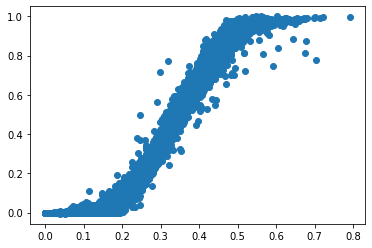

In [ ]:
plt.scatter(df1_['Ws_avg'],df1_['P_avg'])

In [ ]:
X, y = df1_['Ws_avg'].values, df1_['P_avg'].values
print(X.shape,y.shape)

(43556,) (43556,)


In [ ]:
windowin=1
windowout=1

In [ ]:
dataX=[]
datay=[]
for i in range(len(y)):
  if windowin+i==len(y):
    break
  dataX.append(X[i:i+windowin,])
  datay.append(y[i+windowin-windowout:i+windowin])

In [ ]:
dataX, datay=np.array(dataX), np.array(datay)
print(dataX.shape, datay.shape)

(43555, 1) (43555, 1)


In [ ]:
dataX=dataX.reshape(-1,windowin,1)
datay=datay.reshape(-1,windowout,1)
print(dataX.shape, datay.shape)

(43555, 1, 1) (43555, 1, 1)


In [ ]:
split = int(0.1*len(dataX))
x_train, y_train=dataX[:len(dataX)-split,:,:], datay[:len(dataX)-split,:,:]
x_test, y_test=dataX[-split:,:,:], datay[-split:,:,:]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(39200, 1, 1) (39200, 1, 1) (4355, 1, 1) (4355, 1, 1)


In [ ]:
#x_train1, y_train1=df['Ws_avg'].values, df['P_avg'].values
#print(x_train1.shape,y_train1.shape)

x_train1, y_train1=df['Ws_avg'][:-100000].values, df['P_avg'][:-100000].values
x_test, y_test=df['Ws_avg'][-100000:].values, df['P_avg'][-100000:].values
print(x_train1.shape,y_train1.shape,x_test.shape,y_test.shape)

(919481,) (919481,) (100000,) (100000,)


In [ ]:
x_train2, y_train2=df_['Ws'].values, df_['TARGETVAR'].values
print(x_train2.shape,y_train2.shape)

#x_train2, y_train2=df_['Ws'][:-200000].values, df_['TARGETVAR'][:-200000].values
#x_test, y_test=df_['Ws'][-200000:].values, df_['TARGETVAR'][-200000:].values
#print(x_train2.shape,y_train2.shape,x_test.shape,y_test.shape)

(1535984,) (1535984,)


In [ ]:
x_train1=x_train1.reshape(-1,1,1)
y_train1=y_train1.reshape(-1,1,1)
x_train2=x_train2.reshape(-1,1,1)
y_train2=y_train2.reshape(-1,1,1)
x_test=x_test.reshape(-1,1,1)
y_test=y_test.reshape(-1,1,1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.optimizers import SGD

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1,1),return_sequences=True))
#model.add(Dropout(0.4))
#model.add(LSTM(200, activation='relu', return_sequences=True))
#model.add(LSTM(500, activation='relu', return_sequences=True))
#model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(10, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.1, clipnorm=1.0), loss='mse')

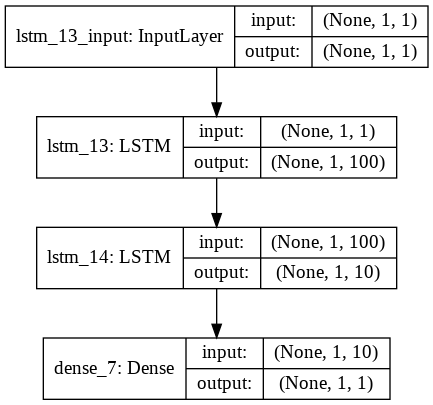

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 100)            40800     
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 10)             4440      
_________________________________________________________________
dense_7 (Dense)              (None, 1, 1)              11        
Total params: 45,251
Trainable params: 45,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs=2
batch_size=4
model.fit(x_train1, y_train1, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/2
919481/919481 [==============================] - 2584s 3ms/step - loss: 0.0100
Epoch 2/2
919481/919481 [==============================] - 2583s 3ms/step - loss: 9.5761e-04


In [ ]:
epochs=2
batch_size=8
model.fit(x_train2, y_train2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/2
1535984/1535984 [==============================] - 2163s 1ms/step - loss: 0.0347
Epoch 2/2
1372480/1535984 [=========================>....] - ETA: 3:46 - loss: 0.0341

In [ ]:
preds=model.predict(x_test, verbose=1)
preds.shape

In [ ]:
preds[5]

array([[0.8029673]], dtype=float32)

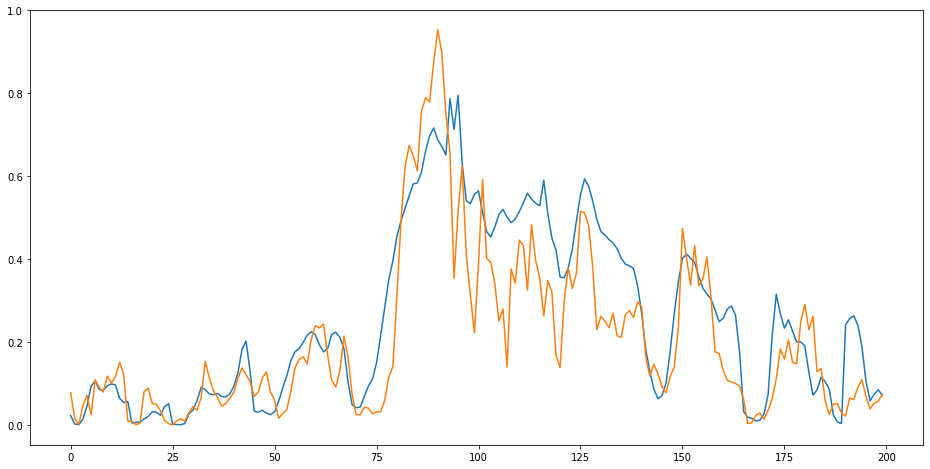

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(200), preds.reshape(-1,1)[700:900,:])
plt.plot(range(200), y_test.reshape(-1,1)[700:900,:])

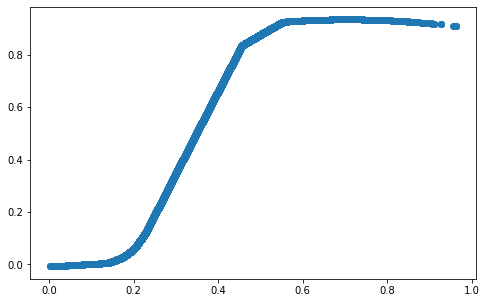

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_test.reshape(-1,1), preds.reshape(-1,1))
#plt.scatter(x_test.reshape(-1,1), y_test.reshape(-1,1))

In [ ]:
model.save('lstm_baseline_lahaute>gef.h5')

In [ ]:
x_test1, y_test1=df['Ws_avg'][-100000:].values, df['P_avg'][-100000:].values
x_test1=x_test1.reshape(-1,1,1)
y_test1=y_test1.reshape(-1,1,1)
print(x_test1.shape,y_test1.shape)

(100000, 1, 1) (100000, 1, 1)


In [ ]:
preds1=model.predict(x_test1, verbose=1)
preds1.shape

100000/100000 [==============================] - 5s 52us/step


(100000, 1, 1)

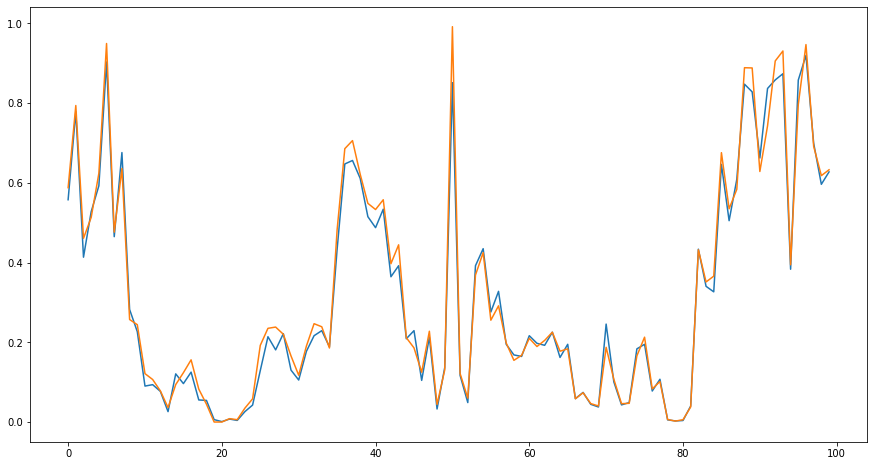

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(100), preds1.reshape(-1,1)[99900:100000,:])
plt.plot(range(100), y_test1.reshape(-1,1)[99900:100000,:])

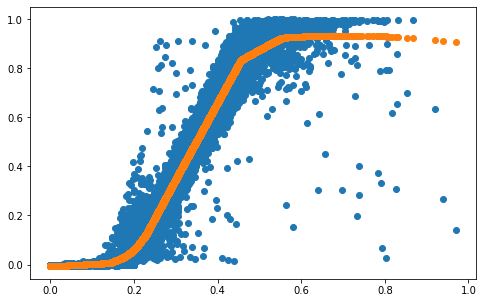

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_test1.reshape(-1,1), y_test1.reshape(-1,1))
plt.scatter(x_test1.reshape(-1,1), preds1.reshape(-1,1))


In [ ]:
model.predict(np.array([[[0.4]]]))

array([[[0.6957029]]], dtype=float32)

# Kaggle Dataset 


In [ ]:
data=pd.read_csv('T1.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


 Capacity of Wind Turbine is 3.6 MW

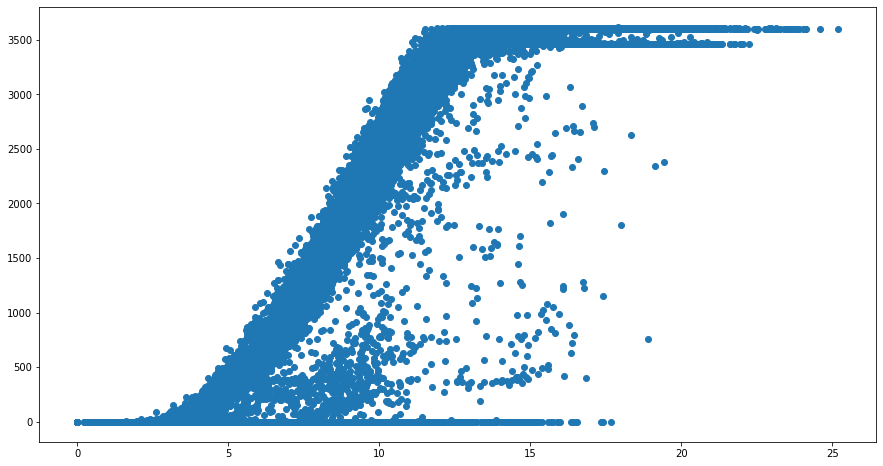

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data['Wind Speed (m/s)'],data['LV ActivePower (kW)'])

In [ ]:
#Data Cleaning
data_=data.loc[(data['LV ActivePower (kW)'] > 50) | (data['Wind Speed (m/s)'] < 4.8)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 250) | (data_['Wind Speed (m/s)'] < 5.6)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 430) | (data_['Wind Speed (m/s)'] < 6)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 950) | (data_['Wind Speed (m/s)'] < 7.5)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 1500) | (data_['Wind Speed (m/s)'] < 9)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 2100) | (data_['Wind Speed (m/s)'] < 10.7)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 2600) | (data_['Wind Speed (m/s)'] < 11.5)]
data_=data_.loc[(data_['LV ActivePower (kW)'] > 3260) | (data_['Wind Speed (m/s)'] < 13.2)]


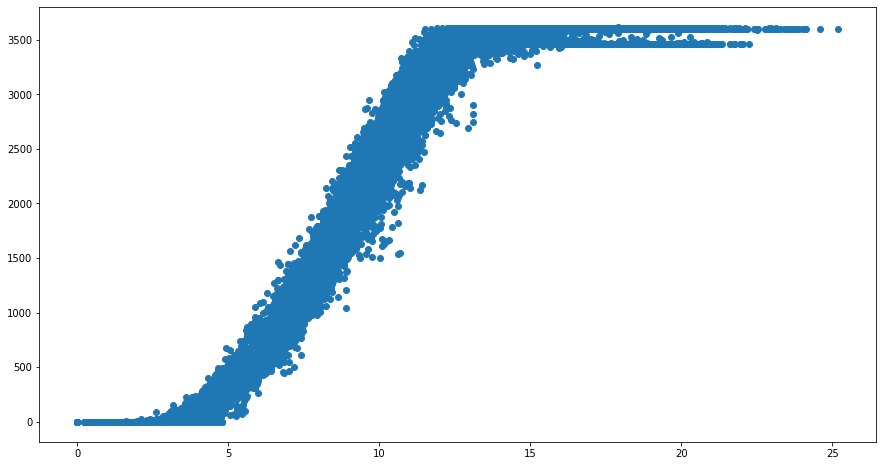

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(data_['Wind Speed (m/s)'],data_['LV ActivePower (kW)'])

In [ ]:
df=data_[['Wind Speed (m/s)','LV ActivePower (kW)']]
df.head()

,Wind Speed (m/s),LV ActivePower (kW)
0,5.311336,380.047791
1,5.672167,453.769196
2,5.216037,306.376587
3,5.659674,419.645905
4,5.577941,380.650696


In [ ]:
len(df)

48134

In [ ]:
df.to_csv('kaggle_scada_clean.csv',header=False,index=False)